<a href="https://colab.research.google.com/github/karimqasim/MachineLearning/blob/master/KNN_ClassifiedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Classified Data to Classified Data


In [0]:
df = pd.read_csv('Classified Data', index_col=0)

If you set index_col to 0, then the first column of the dataframe will become the row label.

In [0]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


This is anonymized classified data so you don't know what these cols represent. You just have to use these cols to predict the target class. 

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variable matters a lot and any variables that are on a large scale will have
a much larger effect on the distance between observations and so you have to standardize everything to the same scale.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
scaler.fit(df.drop('TARGET CLASS', axis=1)) #Standardizing all the variables except the target variable

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we can use this scaler object to do the transformation. The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. 

In [0]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1)) #transform method standardizes by centering and scaling

In [0]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

Note that we now have an array of values which are the scaled version of the actual values. 

In [0]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [0]:
df.columns[:-1] #Note that this includes all the column names expet the last one.

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [0]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Now we start with k=1 and then use elbow method to choose the value of k. 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(X_test)

In [0]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

Evaluation of our model:

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



It looks like our model is doing well with k=1. But we can try to find the best value of k as follows:

We will iterate many models using many different k values and plot out their error rate and see which one has the lowest error rate.

In [0]:
error_rate = []

for i in range(1,40):
  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

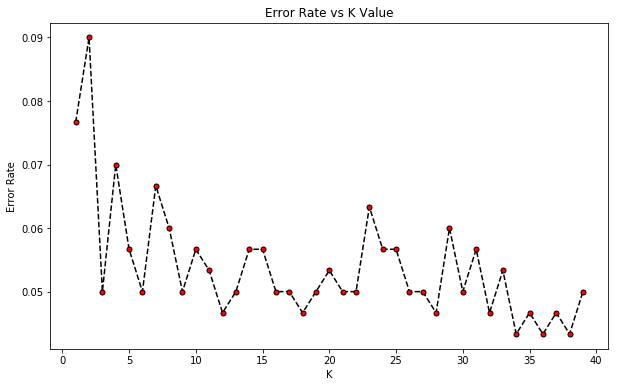

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='black', linestyle='dashed', marker='o', 
               markerfacecolor='red', markersize=5)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We will choose k=17 as the error rate goes pretty low at that value. We are not choosing very high k-value as it is computationally expensive. 

The reason why the error rate keeps going up and down is because the error rate is already too low when we use k=1 and stays within 0.05 to 0.07.

In [0]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05]

In [0]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



Now we are at 95% instead of 92% with k=1